In [2]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate
import matplotlib

In [27]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [3]:
def mean(arr):
    return np.mean(arr)

def error(x):
    return x.std() / np.sqrt(x.size)

def weighted_error(x, err):
    
    x = np.asarray(x)
    err = np.asarray(err)
    
    average = np.sum(x/(err**2))/np.sum(1/err**2)
    
    average_error = 1/np.sqrt(np.sum(1/err**2))
    
    return average, average_error


In [4]:
def V_to_Q(V):
   
    C = 100/(10**9)
    Q = C*V
    
    return Q

def fit_sila_naboj(Q,A):
    return A*(Q**2)

def fit2_sila_naboj(Q,A,b):
    return A*Q + b

U = [5,10,15,20,25]
a = np.array([5,6.5,7,8])
a_m = a/100

F = np.array([
    [0.08,0.2,0.25,0.36,0.42],
    [0.05,0.14,0.27,0.35,0.45],
    [0.1,0.16,0.22,0.32,0.39],
    [0.06,0.14,0.22,0.34,0.42]
])

F4 = np.array([0.08,0.15,0.26,0.38])
Q4_volt = np.array([0.02,0.6,1,1.9])

Q_volt = np.array([
    [0.1,0.2,0.4,0.6,1],
    [0.1,0.2,0.3,0.4,0.8],
    [0.1,0.2,0.3,0.4,0.5],
    [0.01,0.1,0.1,0.3,0.5]
])

a_m

# **Jeden graf**

In [256]:
U = [5,10,15,20,25]
a = np.array([5,6.5,7,8])
a_m = a/100

F = np.array([
    [0.08,0.2,0.25,0.36],
    [0.05,0.14,0.27,0.35],
    [0.1,0.16,0.22,0.32],
    [0.06,0.14,0.22,0.34]
])

F4 = np.array([0.08,0.15,0.26,0.38])
Q4_volt = np.array([0.02,0.6,1,1.9])

Q_volt = np.array([
    [0.1,0.2,0.4,0.6],
    [0.1,0.2,0.3,0.4],
    [0.1,0.2,0.3,0.4],
    [0.01,0.1,0.1,0.3]
])

a_m

array([0.05 , 0.065, 0.07 , 0.08 ])

In [257]:
F = F/(10**3)
F4 = F4/(10**3)
F

array([[8.0e-05, 2.0e-04, 2.5e-04, 3.6e-04],
       [5.0e-05, 1.4e-04, 2.7e-04, 3.5e-04],
       [1.0e-04, 1.6e-04, 2.2e-04, 3.2e-04],
       [6.0e-05, 1.4e-04, 2.2e-04, 3.4e-04]])

In [258]:
Q = V_to_Q(Q_volt)
Q4 = V_to_Q(Q4_volt)

Q

array([[1.e-08, 2.e-08, 4.e-08, 6.e-08],
       [1.e-08, 2.e-08, 3.e-08, 4.e-08],
       [1.e-08, 2.e-08, 3.e-08, 4.e-08],
       [1.e-09, 1.e-08, 1.e-08, 3.e-08]])

In [259]:
A_spoct = F/(Q**2)
print(A_spoct)

A_prumer = [mean(A_spoct[i]) for i in range(4)]
A_chyba = [error(A_spoct[i]) for i in range(4)]
print(A_prumer)
print(A_chyba)

[[8.00000000e+11 5.00000000e+11 1.56250000e+11 1.00000000e+11]
 [5.00000000e+11 3.50000000e+11 3.00000000e+11 2.18750000e+11]
 [1.00000000e+12 4.00000000e+11 2.44444444e+11 2.00000000e+11]
 [6.00000000e+13 1.40000000e+12 2.20000000e+12 3.77777778e+11]]
[389062500000.0, 342187500000.0, 461111111111.11115, 15994444444444.443]
[141185947174.94904, 51224031149.329704, 159933435227.60867, 12707413445759.975]


In [260]:
A_fit = []
A_fit_err = []

for i in range(4):
    params, err = curve_fit(fit_sila_naboj, Q[i], F[i], p0 = [1000000000000])

    A_err = np.sqrt(np.diag(err))
    A, = params
    
    A_fit.append(A)
    A_fit_err.append(A_err[0])


print(A_fit)
print(A_fit_err)

[113702995600.93211, 244067796570.42725, 221468926634.8116, 412119985405.1421]
[27522073528.07142, 24977247119.81093, 34674110661.71389, 136258349807.93298]


In [276]:
A2_fit = []
A2_fit_err = []
B = []

for i in range(4):
    params, err = curve_fit(fit2_sila_naboj, Q[i]**2, F[i],p0 = [900000000000000,0])

    A2_err, b_err = np.sqrt(np.diag(err))
    A2, b = params
    
    A2_fit.append(A2)
    A2_fit_err.append(A2_err)
    B.append(b)
 

print(A2_fit)
print(B)
print(A2_fit_err)

[68153287141.55417, 198837207952.2471, 142635658884.76526, 252148801454.93253]
[0.00012538156574541258, 5.337209450144947e-05, 9.302325584931106e-05, 0.00012059604251425051]
[18757123580.16367, 30961689751.936893, 7751937966.20678, 93922825010.01056]


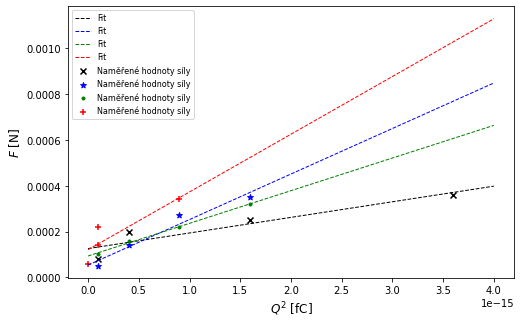

In [277]:
x_range = np.linspace(0,0.4*(10**(-14)),500)

plt.figure(figsize = (8,5))

plt.scatter(Q[0]**2,F[0], marker = 'x', color='black', label='Naměřené hodnoty síly')
plt.scatter(Q[1]**2,F[1], marker = '*', color='blue', label='Naměřené hodnoty síly')
plt.scatter(Q[2]**2,F[2], marker = '.', color='green', label='Naměřené hodnoty síly')
plt.scatter(Q[3]**2,F[3], marker = '+', color='red', label='Naměřené hodnoty síly')


#plt.plot(x_range, fit_sila_naboj(x_range,A_fit[0]) , color="k", linestyle='dashed', linewidth=1, label='Fit')
plt.plot(x_range, A2_fit[0]*x_range + B[0] , color="k", linestyle='dashed', linewidth=1, label='Fit')
plt.plot(x_range, A2_fit[1]*x_range + B[1] , color="b", linestyle='dashed', linewidth=1, label='Fit')
plt.plot(x_range, A2_fit[2]*x_range + B[2], color="g", linestyle='dashed', linewidth=1, label='Fit')
plt.plot(x_range, A2_fit[3]*x_range + B[3], color="r", linestyle='dashed', linewidth=1, label='Fit')

plt.legend(loc='upper left', fontsize=8)
#plt.legend(fontsize=8)

#popisky os
plt.ylabel("$F$ [N]", fontsize=12)
plt.xlabel("$Q^2$ [fC]", fontsize=12)



plt.savefig('a4.pdf')
plt.show()


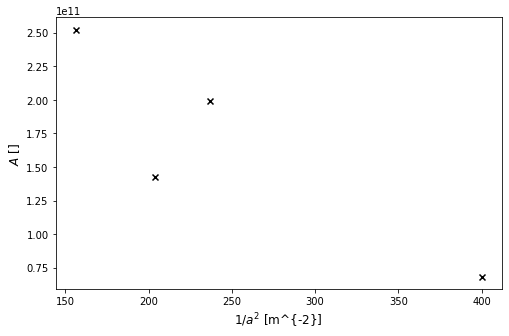

In [278]:
#x_range = np.linspace(0,1.2*(10**(-14)),500)

plt.figure(figsize = (8,5))

plt.scatter(1/a_m**2,A2_fit, marker = 'x', color='black', label='Naměřené hodnoty síly')


#plt.plot(x_range, fit_sila_naboj(x_range,A_fit[0]) , color="k", linestyle='dashed', linewidth=1, label='Fit')
#plt.plot(x_range, A2_fit[1]*x_range , color="k", linestyle='dashed', linewidth=1, label='Fit')

#plt.legend(loc='upper left', fontsize=8)
#plt.legend(fontsize=8)

#popisky os
plt.ylabel("$A$ []", fontsize=12)
plt.xlabel("$1/a^2$ [m^{-2}]", fontsize=12)



plt.savefig('A_a.pdf')
plt.show()


# **Jednotlive grafy**

## DATA

In [62]:
############# CIZI ##################

U = [5,10,15,20,25]
a = np.array([5,5.5,6.5,7])
a_m = a/100

F1 = np.array([0.1,0.2,0.4,0.5,0.6]) ##[0.08,0.2,0.25,0.36,0.42]
F2 = np.array([0.1,0.2,0.4,0.6,0.9]) ##[0.05,0.14,0.27,0.35,0.45]
F3 = np.array([0.1,0.2,0.4,0.6,0.8])
F4 = np.array([0.1,0.1,0.2,0.2,0.3]) ##[0.06,0.14,0.22,0.34,0.42]
        
Q1_volt = np.array([0.07,0.11,0.15,0.23,0.32]) ##[0.1,0.2,0.4,0.6,1]
Q2_volt = np.array([0.07,0.16,0.21,0.24,0.29]) ##[0.1,0.2,0.3,0.4,0.8]
Q3_volt = np.array([0.04,0.13,0.19,0.27,0.3])
Q4_volt = np.array([0.13,0.13,0.18,0.2,0.28]) ##[0,0.1,0.1,0.3,0.5]
    


In [72]:
################ VZOROVA s 4 cm ###################

U = [5,10,15,20,25]
a = np.array([4,5,6.5,7,8])
a_m = a/100

F0 = np.array([0.08,0.15,0.38]) ##[0.08,0.2,0.25,0.36,0.42]
F1 = np.array([0.08,0.2,0.25,0.36]) ##[0.08,0.2,0.25,0.36,0.42]
F2 = np.array([0.05,0.14,0.27,0.35]) ##[0.05,0.14,0.27,0.35,0.45]
F3 = np.array([0.1,0.16,0.22,0.32,0.39])
F4 = np.array([0.14,0.22,0.34,0.42]) ##[0.06,0.14,0.22,0.34,0.42]
 
Q0_volt = np.array([0.02,0.6,1.9]) ##[0.1,0.2,0.4,0.6,1]    
Q1_volt = np.array([0.1,0.2,0.4,0.6]) ##[0.1,0.2,0.4,0.6,1]
Q2_volt = np.array([0.1,0.2,0.3,0.4]) ##[0.1,0.2,0.3,0.4,0.8]
Q3_volt = np.array([0.1,0.2,0.3,0.4,0.5])
Q4_volt = np.array([0.1,0.1,0.3,0.5]) ##[0,0.1,0.1,0.3,0.5]
    


In [5]:
################ VZOROVA ###################

U = [5,10,15,20,25]
a = np.array([5,6.5,7,8])
a_m = a/100


F1 = np.array([0.08,0.2,0.25,0.36]) ##[0.08,0.2,0.25,0.36,0.42]
F2 = np.array([0.05,0.14,0.27,0.35]) ##[0.05,0.14,0.27,0.35,0.45]
F3 = np.array([0.1,0.16,0.22,0.32,0.39]) 
F4 = np.array([0.14,0.22,0.34,0.42]) ##[0.06,0.14,0.22,0.34,0.42]
        
Q1_volt = np.array([0.1,0.2,0.4,0.6]) ##[0.1,0.2,0.4,0.6,1]
Q2_volt = np.array([0.1,0.2,0.3,0.4]) ##[0.1,0.2,0.3,0.4,0.8]
Q3_volt = np.array([0.1,0.2,0.3,0.4,0.5])
Q4_volt = np.array([0.1,0.1,0.3,0.5]) ##[0,0.1,0.1,0.3,0.5]
    


In [6]:
F1 = F1/(10**3)
F2 = F2/(10**3)
F3 = F3/(10**3)
F4 = F4/(10**3)

Q1 = V_to_Q(Q1_volt)
Q2 = V_to_Q(Q2_volt)
Q3 = V_to_Q(Q3_volt)
Q4 = V_to_Q(Q4_volt)


In [7]:
F = [F1,F2,F3,F4]
Q = [Q1,Q2,Q3,Q4]

In [8]:
print(Q1)
print(Q2)
print(Q3)
print(Q4)

[1.e-08 2.e-08 4.e-08 6.e-08]
[1.e-08 2.e-08 3.e-08 4.e-08]
[1.e-08 2.e-08 3.e-08 4.e-08 5.e-08]
[1.e-08 1.e-08 3.e-08 5.e-08]


In [9]:
A_fit = []
A_fit_err = []

for i in range(4):
    params, err = curve_fit(fit_sila_naboj, Q[i], F[i], p0 = [1000000000000])

    A_err = np.sqrt(np.diag(err))
    A, = params
    
    A_fit.append(A)
    A_fit_err.append(A_err[0])

A_fit = np.array(A_fit)
A_fit_err = np.array(A_fit_err)
    
print(A_fit)
print(A_fit_err)

[1.13702996e+11 2.44067797e+11 1.79673136e+11 1.96610170e+11]
[2.75220735e+10 2.49772471e+10 2.39460973e+10 6.37492454e+10]


In [15]:
A2_fit = []
A2_fit_err = []
B = []
B_err = []

for i in range(4):
    params, err = curve_fit(fit2_sila_naboj, Q[i]**2, F[i],p0 = [900000000000000,0])

    A2_err, b_err = np.sqrt(np.diag(err))
    A2, b = params
    
    A2_fit.append(A2)
    A2_fit_err.append(A2_err)
    B.append(b)
    B_err.append(b_err)

A2_fit = np.array(A2_fit)
A2_fit_err = np.array(A2_fit_err)   
B = np.array(B)   
B_err = np.array(B_err)   

print("A: " , A2_fit)
print("A_err: " , A2_fit_err)
print("B: " , B)
print("B_err: " , B_err)

A:  [6.81532871e+10 1.98837208e+11 1.20320856e+11 1.00000000e+11]
A_err:  [1.87571236e+10 3.09616898e+10 1.00604899e+10 3.22748615e+10]
B:  [1.25381566e-04 5.33720945e-05 1.05647058e-04 1.90000000e-04]
B_err:  [3.71490500e-05 2.91270361e-05 1.40774981e-05 4.29389102e-05]


In [9]:
fQ = [t*10**7.5 for t in Q]

In [11]:
x_range = np.linspace(0,.4*(10**(-14)),500)
x_range_f = np.linspace(0,4,500)


plt.figure(figsize = (8,5))

plt.scatter(fQ[0]**2,1000*F[0], marker = 'x', color='black', label='5 cm')
plt.scatter(fQ[1]**2,1000*F[1], marker = '*', color='blue', label='6.5 cm')
plt.scatter(fQ[2]**2,1000*F[2], marker = '.', color='green', label='7 cm')
plt.scatter(fQ[3]**2,1000*F[3], marker = '+', color='red', label='8 cm')



plt.plot(x_range_f, 1000*(A2_fit[0]*x_range + B[0]) , color="k", linestyle='dashed', linewidth=1, label='Fit')
plt.plot(x_range_f, 1000*(A2_fit[1]*x_range + B[1])  , color="b", linestyle='dashed', linewidth=1, label='Fit')
plt.plot(x_range_f, 1000*(A2_fit[2]*x_range + B[2]) , color="g", linestyle='dashed', linewidth=1, label='Fit')
plt.plot(x_range_f, 1000*(A2_fit[3]*x_range + B[3]) , color="r", linestyle='dashed', linewidth=1, label='Fit')


plt.legend(loc='upper left', fontsize=8)
#plt.legend(fontsize=8)

#popisky os
plt.ylabel("$F$ [mN]", fontsize=12)
plt.xlabel("$Q^2$ [fC]", fontsize=12)



plt.savefig('a.pdf')
plt.show()

NameError: name 'fQ' is not defined

<Figure size 576x360 with 0 Axes>

In [16]:
def linear_func(x,k):
    return k*x

r = 1/(a_m**2)

params, err = curve_fit(linear_func,r,A2_fit, p0=[90000000000])

k,  = params
k_err, = np.sqrt(np.diag(err))
print("{:e}".format(k))
print("{:e}".format(k_err))

r

#4.059207e+08
#1.618898e+08

4.059207e+08
1.618898e+08


array([400.        , 236.68639053, 204.08163265, 156.25      ])

In [17]:
epsilon =  1/(16*np.pi*k)
sepsilon = k_err*epsilon/k


print("{:e}".format(epsilon))
print("{:e}".format(sepsilon))

#4.901048e-11

4.901048e-11
1.954642e-11


C:\Users\stepa\AppData\Local\Temp/ipykernel_10972/330865143.py:24: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


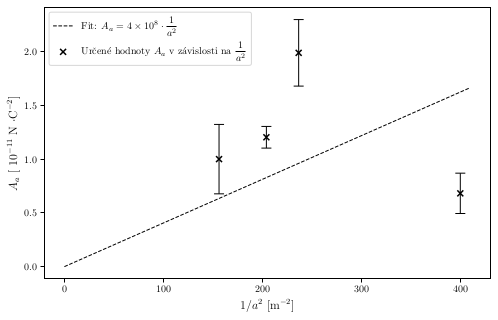

In [28]:
x_range = np.linspace(0,410,500)

plt.figure(figsize = (8,5))

plt.scatter(1/a_m**2,10**(-11)*A2_fit, marker = 'x', color='black', label=r'Určené hodnoty $A_a$ v závislosti na $ \frac{1}{a^2} $')



#plt.plot(x_range, fit_sila_naboj(x_range,A_fit[0]) , color="k", linestyle='dashed', linewidth=1, label='Fit')
plt.plot(x_range, 10**(-11)*linear_func(x_range, k) , color="k", linestyle='dashed', linewidth=1, label=r'Fit: $ A_a = 4 \times 10^8 \cdot \frac{1}{a^2} $')

plt.errorbar(1/a_m**2,10**(-11)*A2_fit,yerr=10**(-11)*A2_fit_err, fmt='none', ecolor="k",elinewidth=1,capsize=5)

plt.legend(loc='upper left', fontsize=10)
#plt.legend(fontsize=9)

#popisky os
plt.ylabel("$A_a$ [ $10^{-11}$ N $\cdot$C$^{-2}$]", fontsize=12)
plt.xlabel("$1/a^2$ [m$^{-2}$]", fontsize=12)



plt.savefig('A_a.pdf')
plt.show()

# Grafy

C:\Users\stepa\AppData\Local\Temp/ipykernel_16124/2721018445.py:23: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


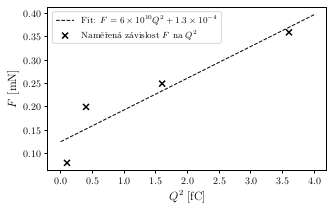

In [28]:
x_range = np.linspace(0,.4*(10**(-14)),500)
x_range_f = np.linspace(0,4,500)


plt.figure(figsize = (5,3))

plt.scatter(fQ[0]**2,1000*F[0], marker = 'x', color='black', label='Naměřená závislost $F$ na $Q^2$')

plt.plot(x_range_f, 1000*(A2_fit[0]*x_range + B[0]) , color="k", linestyle='dashed', linewidth=1, label=r'Fit: $F = 6 \times 10^{10}Q^2 + 1.3 \times 10^{-4}$')



plt.legend(loc='upper left', fontsize=9)
#plt.legend(fontsize=8)

#popisky os
plt.ylabel("$F$ [mN]", fontsize=12)
plt.xlabel("$Q^2$ [fC]", fontsize=12)



plt.savefig('a5.pdf', bbox_inches = 'tight')
plt.show()

C:\Users\stepa\AppData\Local\Temp/ipykernel_16124/2117365755.py:23: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


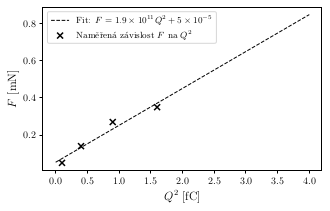

In [29]:
x_range = np.linspace(0,.4*(10**(-14)),500)
x_range_f = np.linspace(0,4,500)


plt.figure(figsize = (5,3))

plt.scatter(fQ[1]**2,1000*F[1], marker = 'x', color='black', label='Naměřená závislost $F$ na $Q^2$')

plt.plot(x_range_f, 1000*(A2_fit[1]*x_range + B[1]) , color="k", linestyle='dashed', linewidth=1, label=r'Fit: $F = 1.9 \times 10^{11}Q^2 + 5 \times 10^{-5}$')



plt.legend(loc='upper left', fontsize=9)
#plt.legend(fontsize=8)

#popisky os
plt.ylabel("$F$ [mN]", fontsize=12)
plt.xlabel("$Q^2$ [fC]", fontsize=12)



plt.savefig('a65.pdf', bbox_inches = 'tight')
plt.show()

C:\Users\stepa\AppData\Local\Temp/ipykernel_16124/2457433448.py:23: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


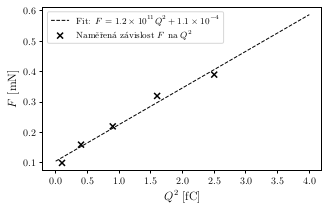

In [30]:
x_range = np.linspace(0,.4*(10**(-14)),500)
x_range_f = np.linspace(0,4,500)


plt.figure(figsize = (5,3))

plt.scatter(fQ[2]**2,1000*F[2], marker = 'x', color='black', label='Naměřená závislost $F$ na $Q^2$')

plt.plot(x_range_f, 1000*(A2_fit[2]*x_range + B[2]) , color="k", linestyle='dashed', linewidth=1, label=r'Fit: $F = 1.2 \times 10^{11}Q^2 + 1.1 \times 10^{-4}$')



plt.legend(loc='upper left', fontsize=9)
#plt.legend(fontsize=8)

#popisky os
plt.ylabel("$F$ [mN]", fontsize=12)
plt.xlabel("$Q^2$ [fC]", fontsize=12)



plt.savefig('a7.pdf', bbox_inches = 'tight')
plt.show()

C:\Users\stepa\AppData\Local\Temp/ipykernel_16124/785443955.py:23: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


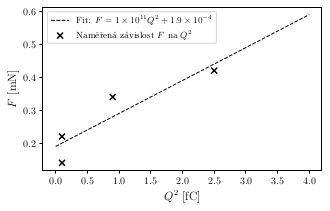

In [31]:
x_range = np.linspace(0,.4*(10**(-14)),500)
x_range_f = np.linspace(0,4,500)


plt.figure(figsize = (5,3))

plt.scatter(fQ[3]**2,1000*F[3], marker = 'x', color='black', label='Naměřená závislost $F$ na $Q^2$')

plt.plot(x_range_f, 1000*(A2_fit[3]*x_range + B[3]) , color="k", linestyle='dashed', linewidth=1, label=r'Fit: $F = 1 \times 10^{11}Q^2 + 1.9 \times 10^{-4}$')



plt.legend(loc='upper left', fontsize=9)
#plt.legend(fontsize=8)

#popisky os
plt.ylabel("$F$ [mN]", fontsize=12)
plt.xlabel("$Q^2$ [fC]", fontsize=12)



plt.savefig('a8.pdf', bbox_inches = 'tight')
plt.show()

C:\Users\stepa\AppData\Local\Temp/ipykernel_16124/2431009334.py:37: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


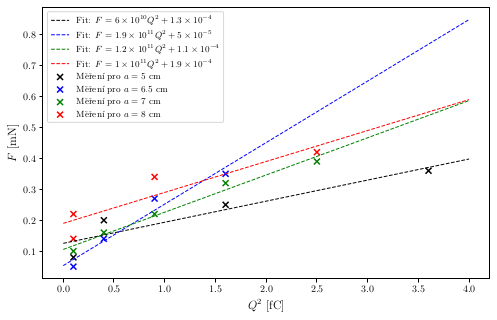

In [26]:
x_range = np.linspace(0,.4*(10**(-14)),500)
x_range_f = np.linspace(0,4,500)


plt.figure(figsize = (8,5))



plt.scatter(fQ[0]**2,1000*F[0], marker = 'x', color='black', label='Měření pro $a = 5$ cm')

plt.plot(x_range_f, 1000*(A2_fit[0]*x_range + B[0]) , color="k", linestyle='dashed', linewidth=1, label=r'Fit: $F = 6 \times 10^{10}Q^2 + 1.3 \times 10^{-4}$')

plt.scatter(fQ[1]**2,1000*F[1], marker = 'x', color='blue', label='Měření pro $a = 6.5$ cm')

plt.plot(x_range_f, 1000*(A2_fit[1]*x_range + B[1]) , color="blue", linestyle='dashed', linewidth=1, label=r'Fit: $F = 1.9 \times 10^{11}Q^2 + 5 \times 10^{-5}$')

plt.scatter(fQ[2]**2,1000*F[2], marker = 'x', color='green', label='Měření pro $a = 7$ cm')

plt.plot(x_range_f, 1000*(A2_fit[2]*x_range + B[2]) , color="green", linestyle='dashed', linewidth=1, label=r'Fit: $F = 1.2 \times 10^{11}Q^2 + 1.1 \times 10^{-4}$')

plt.scatter(fQ[3]**2,1000*F[3], marker = 'x', color='red', label='Měření pro $a = 8$ cm')

plt.plot(x_range_f, 1000*(A2_fit[3]*x_range + B[3]) , color="red", linestyle='dashed', linewidth=1, label=r'Fit: $F = 1 \times 10^{11}Q^2 + 1.9 \times 10^{-4}$')



plt.legend(loc='upper left', fontsize=9)
#plt.legend(fontsize=8)

#popisky os
plt.ylabel("$F$ [mN]", fontsize=12)
plt.xlabel("$Q^2$ [fC]", fontsize=12)



plt.savefig('a.pdf')
plt.show()

In [ ]:
A:  [6.81532871e+10 1.98837208e+11 1.20320856e+11 1.00000000e+11]
A_err:  [2.75220735e+10 2.49772471e+10 2.39460973e+10 6.37492454e+10]
B:  [1.25381566e-04 5.33720945e-05 1.05647058e-04 1.90000000e-04]
B_err:  [3.71490500e-05 2.91270361e-05 1.40774981e-05 4.29389102e-05]